<a href="https://colab.research.google.com/github/abhidp55/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the Data and Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Git_ML/Kaggle Titanic/train.csv')

#Exploratory Data Analysis

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
print(f'Number of columns are : {train.shape[1]}, and number of rows are : {train.shape[0]}')

Number of columns are : 12, and number of rows are : 891


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train['Cabin'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [ ]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
train['Embarked'].nunique()

3

##Visualisations

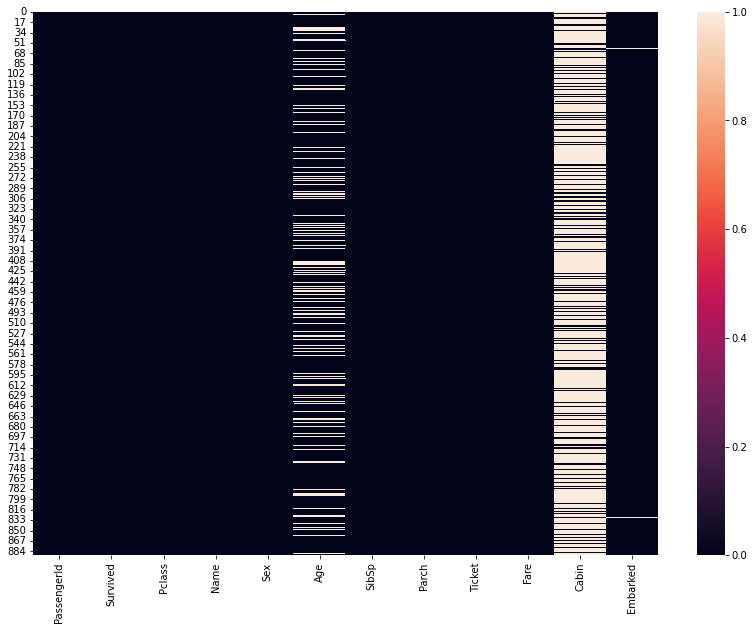

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(train.isnull())

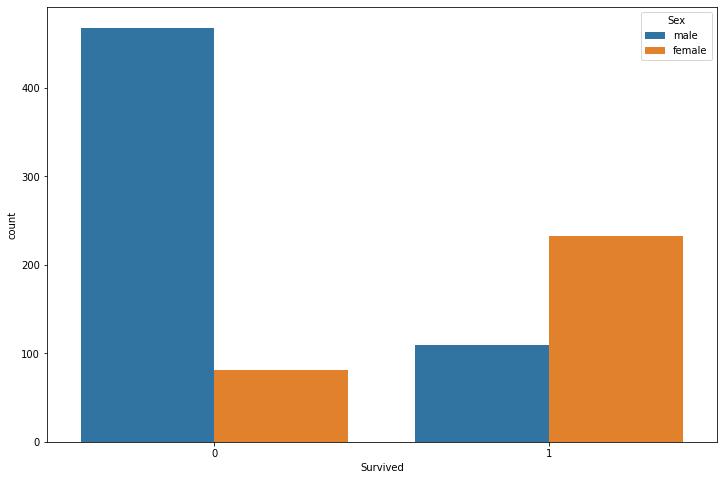

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(train['Survived'], hue = train['Sex'])

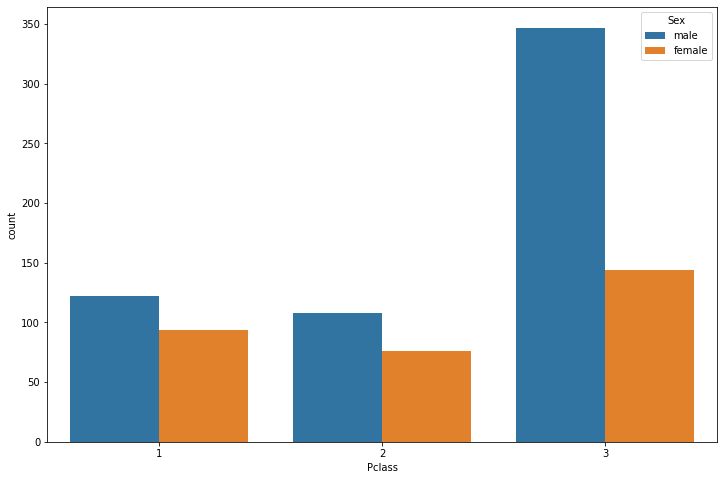

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(train['Pclass'], hue = train['Sex'])

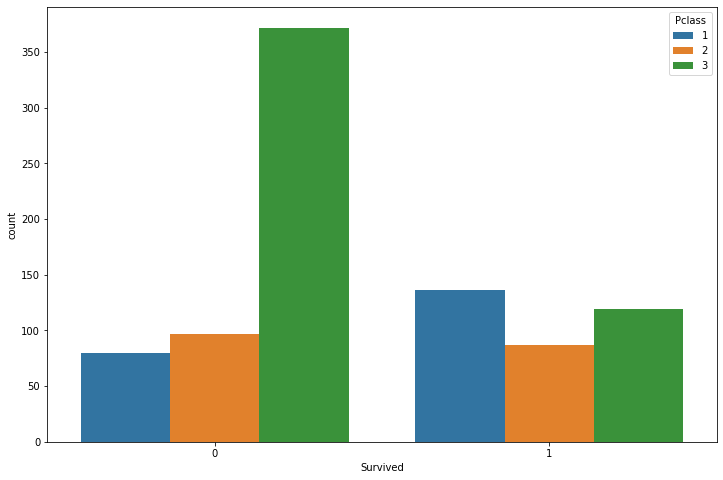

In [ ]:
plt.figure(figsize = (12, 8))
sns.countplot(x = train['Survived'], hue = train['Pclass'])

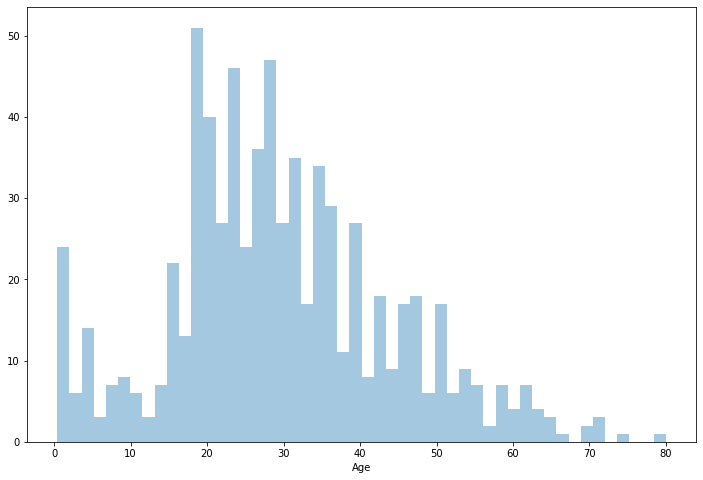

In [ ]:
plt.figure(figsize = (12, 8))
sns.distplot(train['Age'].dropna(), kde = False, bins = 50) 

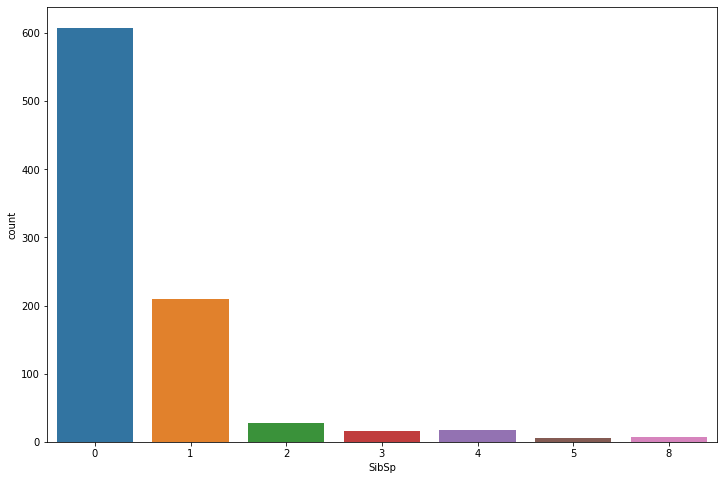

In [ ]:
plt.figure(figsize = (12, 8))
sns.countplot(train['SibSp'])

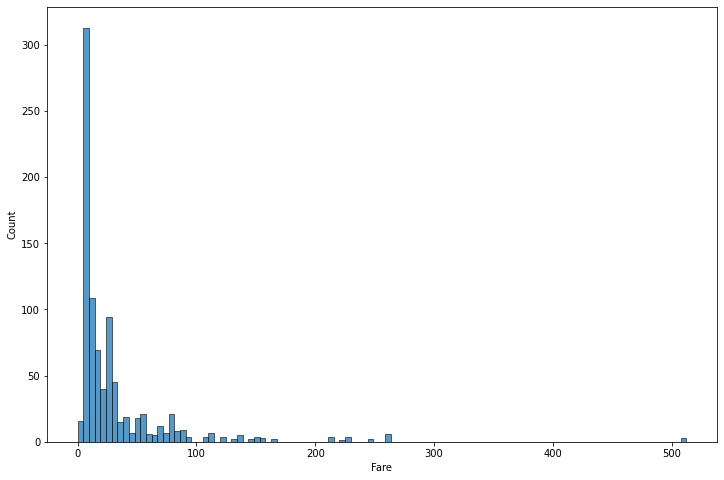

In [ ]:
plt.figure(figsize = (12, 8))
sns.histplot(train['Fare'])

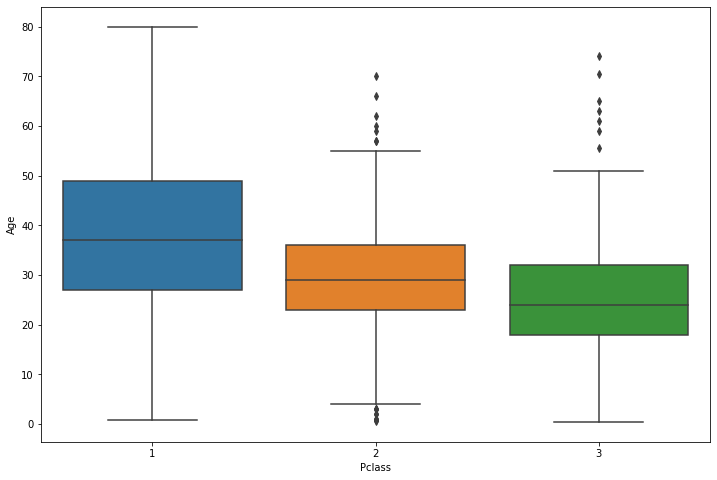

In [ ]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = train['Pclass'], y = train['Age'])

In [ ]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


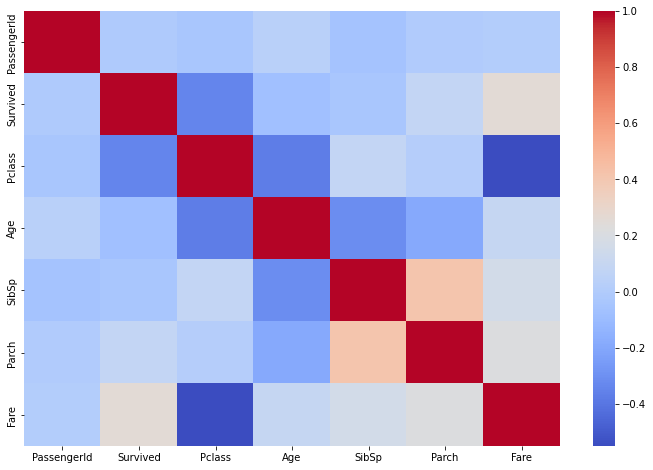

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(train.corr(), cmap = 'coolwarm')

#Data Cleaning

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], inplace = True, axis = 1)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


##Filling in null values

###Age

In [ ]:
def impute_age(cols):

  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return 37
    elif pclass == 2:
      return 29
    elif pclass == 3:
      return 24
  else:
    return age

In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

###Embarked

In [ ]:
train['Embarked']= train['Embarked'].fillna(train['Embarked'].value_counts().index[0])

In [ ]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##OneHotEncoding

### We do not OneHotEncode 'Parch' because test data has different values

In [ ]:
pclass = pd.get_dummies(train['Pclass'],drop_first = True)
sex = pd.get_dummies(train['Sex'],drop_first = True)
sibsp = pd.get_dummies(train['SibSp'], drop_first = True)
embarked = pd.get_dummies(train['Embarked'],drop_first = True)
train.drop(['Pclass', 'Sex', 'SibSp', 'Embarked'],axis = 1,inplace = True)
train = pd.concat([train, pclass, sex, sibsp, embarked],axis = 1)

In [ ]:
train.head()

,Survived,Age,Parch,Fare,2,3,male,1,2,3,4,5,8,Q,S
0,0,22.0,0,7.2500,0,1,1,1,0,0,0,0,0,0,1
1,1,38.0,0,71.2833,0,0,0,1,0,0,0,0,0,0,0
2,1,26.0,0,7.9250,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,0,53.1000,0,0,0,1,0,0,0,0,0,0,1
4,0,35.0,0,8.0500,0,1,1,0,0,0,0,0,0,0,1


#Train Test Split (no need to split due of test.csv but for verifying accuracy, we split)

In [ ]:
X = train.drop('Survived', axis = 1).values
y = train['Survived'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

##Normalise Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Import ML models

In [ ]:
import sklearn
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve

##Logistic Regression

In [ ]:
log = LogisticRegression()
start_time = time.time()
log.fit(X_train, y_train)
total_time_training_log = time.time() - start_time
start_time = time.time()
y_pred = log.predict(X_test)
total_time_inference_log = time.time() - start_time

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')

print("Total Time for training a Logistic Regression Classifier is", total_time_training_log)
print("Total Time for inference of a Logistic Regression Classifier is", total_time_inference_log)

acc_logreg = accuracy_score(y_test,y_pred)
recall_logreg = recall_score(y_test,y_pred)
precision_logreg = precision_score(y_test,y_pred)
f1_logreg = f1_score(y_test,y_pred)

Accuracy Score: 0.8430493273542601


Confusion Matrix: 
[[128  18]
 [ 17  60]]


Area Under Curve: 0.8279665539939512


Recall score: 0.7792207792207793


Precision score: 0.7692307692307693


f1 score: 0.7741935483870968


Total Time for training a Logistic Regression Classifier is 0.03425288200378418
Total Time for inference of a Logistic Regression Classifier is 0.0003261566162109375


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.88      0.88      0.88       146
    Survived       0.77      0.78      0.77        77

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



###Log Reg Grid Search

In [ ]:
param_grid={'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]} #l1 lasso l2 ridge
logreg=LogisticRegression()
grid=GridSearchCV(logreg,param_grid,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.7994572591587517


In [ ]:
log_grid = LogisticRegression(C = 100, penalty = 'l2')
log_grid.fit(X_train, y_train)
y_pred = log_grid.predict(X_test)
log_grid_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       146
           1       0.78      0.78      0.78        77

    accuracy                           0.85       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.85      0.85      0.85       223



##SVC

In [ ]:
svc = SVC()
start_time = time.time()
svc.fit(X_train, y_train)
total_time_training_svc = time.time() - start_time
start_time = time.time()
y_pred = svc.predict(X_test)
total_time_inference_svc = time.time() - start_time
acc_svc = accuracy_score(y_test, y_pred)
print("Total Time for training a SVC is", total_time_training_svc)
print("Total Time for inference of a SVC is", total_time_inference_svc)

Total Time for training a SVC is 0.029801607131958008
Total Time for inference of a SVC is 0.00942683219909668


In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print(f'f1 score: {f1_score(y_test, y_pred)}')

recall_svc = recall_score(y_test, y_pred)
precision_svc = precision_score(y_test, y_pred)
f1_svc = f1_score(y_test, y_pred)

Accuracy Score: 0.8430493273542601
Confusion Matrix: 
[[135  11]
 [ 24  53]]
Area Under Curve: 0.8064846112791318
Recall score: 0.6883116883116883
Precision score: 0.828125
f1 score: 0.7517730496453902


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.85      0.92      0.89       146
    Survived       0.83      0.69      0.75        77

    accuracy                           0.84       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.84      0.84       223



###SVC Grid Search

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [ ]:
svc_grid = SVC(C = 1000, gamma = 0.0001)
svc_grid.fit(X_train, y_train)
y_pred = svc_grid.predict(X_test)
svc_grid_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       146
           1       0.75      0.71      0.73        77

    accuracy                           0.82       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



##XGBoost

In [ ]:
start_time = time.time()
clf = XGBClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0).fit(X_train, y_train)
total_time_training_xgb = time.time() - start_time
start_time = time.time()
y_test = clf.predict(X_test)
total_time_inference_xgb = time.time() - start_time

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')

print("Total Time for training a XGBoost is", total_time_training_xgb)
print("Total Time for inference of a XGBoost is", total_time_inference_xgb)

acc_xgb = accuracy_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)

Accuracy Score: 0.8385650224215246


Confusion Matrix: 
[[127  13]
 [ 23  60]]


Area Under Curve: 0.8150172117039587


Recall score: 0.7228915662650602


Precision score: 0.821917808219178


f1 score: 0.7692307692307693


Total Time for training a XGBoost is 0.0405421257019043
Total Time for inference of a XGBoost is 0.0011250972747802734


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.85      0.91      0.88       140
    Survived       0.82      0.72      0.77        83

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223



###XGBoost Grid Search

In [ ]:
params = {
        'min_child_weight': [1, 2.5, 5, 7.5, 10],
        'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True)

grid = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train))
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f27176955d0>,
                   estimator=XGBClassifier(), n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 2.5, 5, 7.5,
                                                             10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='roc_auc')

In [ ]:
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best hyperparameters:')
print(grid.best_params_)


 Best estimator:
XGBClassifier(colsample_bytree=0.8, gamma=2.5, max_depth=4, subsample=0.8)

 Best hyperparameters:
{'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 2.5, 'colsample_bytree': 0.8}


In [ ]:
xgb_grid = XGBClassifier(n_estimators=100, learning_rate=0.001, max_depth=5, subsample = 0.6, min_child_weight = 2.5, gamma = 1.5, colsample_bytree = 1).fit(X_train, y_train)
y_pred = xgb_grid.predict(X_test)
xgb_grid_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       140
           1       0.83      0.75      0.78        83

    accuracy                           0.85       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.85      0.85      0.85       223



##Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
start_time = time.time()
tree.fit(X_train, y_train)
total_time_training_tree = time.time() - start_time
start_time = time.time()
y_pred = tree.predict(X_test)
total_time_inference_tree = time.time() - start_time

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')


print("Total Time for training a Decision Tree is", total_time_training_tree)
print("Total Time for inference of a Decision Tree is", total_time_inference_tree)

acc_tree = accuracy_score(y_test, y_pred)
recall_tree = recall_score(y_test, y_pred)
precision_tree = precision_score(y_test, y_pred)
f1_tree = f1_score(y_test, y_pred)

Accuracy Score: 0.874439461883408


Confusion Matrix: 
[[125  15]
 [ 13  70]]


Area Under Curve: 0.8681153184165233


Recall score: 0.8433734939759037


Precision score: 0.8235294117647058


f1 score: 0.8333333333333334


Total Time for training a Decision Tree is 0.004621267318725586
Total Time for inference of a Decision Tree is 0.0006072521209716797


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.91      0.89      0.90       140
    Survived       0.82      0.84      0.83        83

    accuracy                           0.87       223
   macro avg       0.86      0.87      0.87       223
weighted avg       0.88      0.87      0.87       223



###Decision Tree Grid Search

In [ ]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [ ]:
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best hyperparameters:')
print(grid.best_params_)


 Best estimator:
DecisionTreeClassifier(max_depth=4)

 Best hyperparameters:
{'criterion': 'gini', 'max_depth': 4}


In [ ]:
tree_grid = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
tree_grid.fit(X_train, y_train)
y_pred = tree_grid.predict(X_test)
tree_grid_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       140
           1       0.90      0.72      0.80        83

    accuracy                           0.87       223
   macro avg       0.87      0.84      0.85       223
weighted avg       0.87      0.87      0.86       223



##Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=75)
start_time = time.time()
rfc.fit(X_train, y_train)
total_time_training_rfc = time.time() - start_time
start_time = time.time()
y_pred = rfc.predict(X_test)
total_time_inference_rfc = time.time() - start_time

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')

print("Total Time for training a Random Forest Classifier is", total_time_training_rfc)
print("Total Time for inference of a Random Forest Classifier is", total_time_inference_rfc)

acc_rfc = accuracy_score(y_test, y_pred)
recall_rfc = recall_score(y_test, y_pred)
precision_rfc = precision_score(y_test, y_pred)
f1_rfc = f1_score(y_test, y_pred)

Accuracy Score: 0.8834080717488789


Confusion Matrix: 
[[129  11]
 [ 15  68]]


Area Under Curve: 0.8703528399311532


Recall score: 0.8192771084337349


Precision score: 0.8607594936708861


f1 score: 0.8395061728395061


Total Time for training a Random Forest Classifier is 0.1414477825164795
Total Time for inference of a Random Forest Classifier is 0.011248350143432617


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.90      0.92      0.91       140
    Survived       0.86      0.82      0.84        83

    accuracy                           0.88       223
   macro avg       0.88      0.87      0.87       223
weighted avg       0.88      0.88      0.88       223



###Random Forest Grid Search

In [ ]:
param_grid = { 
    'n_estimators': [75, 140, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [75, 140, 200, 500]})

In [ ]:
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best hyperparameters:')
print(grid.best_params_)


 Best estimator:
RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=75)

 Best hyperparameters:
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 75}


In [ ]:
rfc_grid = RandomForestClassifier(criterion = 'gini', max_depth = 5, max_features = 'auto', n_estimators= 200)
rfc_grid.fit(X_train, y_train)
y_pred = rfc_grid.predict(X_test)
rbf_grid_acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       140
           1       0.95      0.70      0.81        83

    accuracy                           0.87       223
   macro avg       0.90      0.84      0.86       223
weighted avg       0.88      0.87      0.87       223



##Bagging Decision Tree

In [ ]:
kfold = sklearn.model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
start_time = time.time()
model.fit(X_train, y_train)
total_time_training_bc = time.time() - start_time
start_time = time.time()
y_pred = model.predict(X_test)
total_time_inference_bc = time.time() - start_time

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')

print("Total Time for training a Bagging Decision Tree is", total_time_training_bc)
print("Total Time for inference of a Bagging Decision Tree is", total_time_inference_bc)

acc_bc = accuracy_score(y_test, y_pred)
recall_bc = recall_score(y_test, y_pred)
precision_bc = precision_score(y_test, y_pred)
f1_bc = f1_score(y_test, y_pred)


Accuracy Score: 0.9013452914798207


Confusion Matrix: 
[[130  10]
 [ 12  71]]


Area Under Curve: 0.8919965576592083


Recall score: 0.8554216867469879


Precision score: 0.8765432098765432


f1 score: 0.8658536585365854


Total Time for training a Bagging Decision Tree is 0.2656078338623047
Total Time for inference of a Bagging Decision Tree is 0.014773368835449219


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.92      0.93      0.92       140
    Survived       0.88      0.86      0.87        83

    accuracy                           0.90       223
   macro avg       0.90      0.89      0.89       223
weighted avg       0.90      0.90      0.90       223



##Naive Bayes

In [ ]:
clf = GaussianNB()
start_time = time.time()
clf = clf.fit(X_train, y_train)
total_time_training_nb = time.time() - start_time
start_time = time.time()
y_pred = clf.predict(X_test)
total_time_inference_nb = time.time() - start_time

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')

print("Total Time for training a Naive Bayes Classifier is", total_time_training_nb)
print("Total Time for inference of a Naive Bayes Classifier is", total_time_inference_nb)


acc_nb = accuracy_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)


Accuracy Score: 0.38565022421524664


Confusion Matrix: 
[[  6 134]
 [  3  80]]


Area Under Curve: 0.503356282271945


Recall score: 0.963855421686747


Precision score: 0.37383177570093457


f1 score: 0.5387205387205386


Total Time for training a Naive Bayes Classifier is 0.0020799636840820312
Total Time for inference of a Naive Bayes Classifier is 0.0009970664978027344


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.67      0.04      0.08       140
    Survived       0.37      0.96      0.54        83

    accuracy                           0.39       223
   macro avg       0.52      0.50      0.31       223
weighted avg       0.56      0.39      0.25       223



##KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
start_time = time.time()
knn.fit(X_train, y_train)
total_time_training_knn = time.time() - start_time
start_time = time.time()
y_pred = knn.predict(X_test)
total_time_inference_knn = time.time() - start_time

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')

print("Total Time for training a KNN is", total_time_training_knn)
print("Total Time for inference of a KNN is", total_time_inference_knn)

acc_knn = accuracy_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

Accuracy Score: 0.8385650224215246


Confusion Matrix: 
[[135   5]
 [ 31  52]]


Area Under Curve: 0.79539586919105


Recall score: 0.6265060240963856


Precision score: 0.9122807017543859


f1 score: 0.7428571428571429


Total Time for training a KNN is 0.0034172534942626953
Total Time for inference of a KNN is 0.013772964477539062


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.81      0.96      0.88       140
    Survived       0.91      0.63      0.74        83

    accuracy                           0.84       223
   macro avg       0.86      0.80      0.81       223
weighted avg       0.85      0.84      0.83       223



###Elbow Method

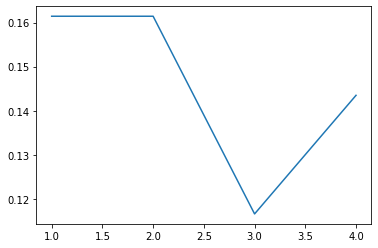

In [ ]:
error_rate = []
range_knn = range(1,5)
for i in range_knn:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    pred_i = classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.plot(range_knn, error_rate)

##Deep Learning

In [ ]:
import keras
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
y_train = np.reshape(y_train, (len(y_train), 1))

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=[X_train.shape[1]], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                960       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [ ]:
number_of_iterations = 20
batch_size = 512
start_time = time.time()
model.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_iterations, verbose=1, validation_data=(X_test, y_test))
total_time_training_dl = time.time() - start_time

Epoch 1/20
2/2 [==============================] - 1s 194ms/step - loss: 0.7156 - accuracy: 0.4476 - val_loss: 0.6853 - val_accuracy: 0.5022
Epoch 2/20
2/2 [==============================] - 0s 30ms/step - loss: 0.7125 - accuracy: 0.4491 - val_loss: 0.6819 - val_accuracy: 0.5022
Epoch 3/20
2/2 [==============================] - 0s 36ms/step - loss: 0.7095 - accuracy: 0.4476 - val_loss: 0.6786 - val_accuracy: 0.5067
Epoch 4/20
2/2 [==============================] - 0s 31ms/step - loss: 0.7066 - accuracy: 0.4446 - val_loss: 0.6753 - val_accuracy: 0.5067
Epoch 5/20
2/2 [==============================] - 0s 32ms/step - loss: 0.7037 - accuracy: 0.4476 - val_loss: 0.6720 - val_accuracy: 0.6099
Epoch 6/20
2/2 [==============================] - 0s 33ms/step - loss: 0.7009 - accuracy: 0.5329 - val_loss: 0.6688 - val_accuracy: 0.6457
Epoch 7/20
2/2 [==============================] - 0s 30ms/step - loss: 0.6981 - accuracy: 0.5569 - val_loss: 0.6656 - val_accuracy: 0.6592
Epoch 8/20
2/2 [==========

In [ ]:
start_time = time.time()
y_pred_value = model.predict(X_test)
total_time_inference_dl = time.time() - start_time
y_pred = [0 if each > 0.5 else 1 for each in y_pred_value]
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print('\n')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print('\n')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print('\n')
print(f'Precision score: {precision_score(y_test, y_pred)}')
print('\n')
print(f'f1 score: {f1_score(y_test, y_pred)}')
print('\n')
print(classification_report(y_test, y_pred, target_names=['Not Fraudulent', 'Fraudulent']))
print('\n')

print("Total Time for training a Deep learning model is", total_time_training_dl)
print("Total Time for inference of a Deep learning model is", total_time_inference_dl)

acc_dl = accuracy_score(y_test, y_pred)
recall_dl = recall_score(y_test, y_pred)
precision_dl = precision_score(y_test, y_pred)
f1_dl = f1_score(y_test, y_pred)

Accuracy Score: 0.27802690582959644


Confusion Matrix: 
[[ 39 101]
 [ 60  23]]


Area Under Curve: 0.27783993115318417


Recall score: 0.27710843373493976


Precision score: 0.18548387096774194


f1 score: 0.22222222222222224


                precision    recall  f1-score   support

Not Fraudulent       0.39      0.28      0.33       140
    Fraudulent       0.19      0.28      0.22        83

      accuracy                           0.28       223
     macro avg       0.29      0.28      0.27       223
  weighted avg       0.32      0.28      0.29       223



Total Time for training a Deep learning model is 1.92930006980896
Total Time for inference of a Deep learning model is 0.11143708229064941


#Results

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','SVC', 
              'XGBoost', 'Decision Trees', 'Random Forest Classifier', 
              'Bagging Decision Tree','Naive Bayes','KNN','Deep Learning'],

    'Accuracy': [acc_logreg,acc_svc, 
              acc_xgb, acc_tree, acc_rfc, 
              acc_bc, acc_nb, acc_knn, acc_dl],

    'Recall': [recall_logreg,recall_svc, 
    recall_xgb, recall_tree, recall_rfc, 
    recall_bc, recall_nb, recall_knn, recall_dl],

    'Precision': [precision_logreg,precision_svc, 
    precision_xgb, precision_tree, precision_rfc, 
    precision_bc, precision_nb, precision_knn, precision_dl],

    'F1': [f1_logreg,f1_svc, 
     f1_xgb, f1_tree, f1_rfc, 
     f1_bc, f1_nb, f1_knn, f1_dl],

     'Training Time': [total_time_training_log,total_time_training_svc, 
      total_time_training_xgb, total_time_training_tree, total_time_training_rfc, 
      total_time_training_bc, total_time_training_nb, total_time_training_knn, total_time_training_dl],

      'Inference Time': [total_time_inference_log,total_time_inference_svc, 
      total_time_inference_xgb, total_time_inference_tree, total_time_inference_rfc, 
      total_time_inference_bc, total_time_inference_nb, total_time_inference_knn, total_time_inference_dl]})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Recall,Precision,F1,Training Time,Inference Time
5,Bagging Decision Tree,0.901345,0.855422,0.876543,0.865854,0.265608,0.014773
4,Random Forest Classifier,0.883408,0.819277,0.860759,0.839506,0.141448,0.011248
3,Decision Trees,0.874439,0.843373,0.823529,0.833333,0.004621,0.000607
0,Logistic Regression,0.843049,0.779221,0.769231,0.774194,0.034253,0.000326
1,SVC,0.843049,0.688312,0.828125,0.751773,0.029802,0.009427
2,XGBoost,0.838565,0.722892,0.821918,0.769231,0.040542,0.001125
7,KNN,0.838565,0.626506,0.912281,0.742857,0.003417,0.013773
6,Naive Bayes,0.385650,0.963855,0.373832,0.538721,0.002080,0.000997
8,Deep Learning,0.278027,0.277108,0.185484,0.222222,1.929300,0.111437


#GridSearch Results

In [ ]:
models = pd.DataFrame({
    
    'Model': ['LogReg_Grid', 'SVC_Grid', 'XGBoost_grid', 'DecisionTree_grid', 'RandomForest_grid'],

    'Accuracy': [log_grid_acc, svc_grid_acc, xgb_grid_acc, tree_grid_acc, rbf_grid_acc]

})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,RandomForest_grid,0.874439
3,DecisionTree_grid,0.865471
0,LogReg_Grid,0.847534
2,XGBoost_grid,0.847534
1,SVC_Grid,0.820628


In [ ]:
## Bagging Decision Tree has highest accuracy of the lot

#Clean Test data and export results

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Git_ML/Kaggle Titanic/test.csv')

In [ ]:
print(f'Number of columns are : {test.shape[1]}, and number of rows are : {test.shape[0]}')

Number of columns are : 11, and number of rows are : 418


In [ ]:
test.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], inplace = True, axis = 1)

In [ ]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis = 1)

## Fill nulls value with mean (Fare has 1 null value)

In [ ]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [ ]:
mean_val = test['Fare'].mean()
test['Fare'].fillna(value = mean_val, inplace = True)

In [ ]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
pclass = pd.get_dummies(test['Pclass'],drop_first = True)
sex = pd.get_dummies(test['Sex'],drop_first = True)
sibsp = pd.get_dummies(test['SibSp'], drop_first = True)
embarked = pd.get_dummies(test['Embarked'],drop_first = True)
test.drop(['Pclass', 'Sex', 'SibSp', 'Embarked'],axis = 1,inplace = True)
test = pd.concat([test, pclass, sex, sibsp, embarked],axis = 1)

In [ ]:
test.head()

,Age,Parch,Fare,2,3,male,1,2,3,4,5,8,Q,S
0,34.5,0,7.8292,0,1,1,0,0,0,0,0,0,1,0
1,47.0,0,7.0000,0,1,0,1,0,0,0,0,0,0,1
2,62.0,0,9.6875,1,0,1,0,0,0,0,0,0,1,0
3,27.0,0,8.6625,0,1,1,0,0,0,0,0,0,0,1
4,22.0,1,12.2875,0,1,0,1,0,0,0,0,0,0,1


#Creating final ML model


In [ ]:
X_train = train.drop('Survived', axis = 1).values
y_train = train['Survived'].values
X_test = test.values

In [ ]:
print(f'X_train shape is {X_train.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'X_test shape is {X_test.shape}')

X_train shape is (891, 14)
y_train shape is (891,)
X_test shape is (418, 14)


In [ ]:
model = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8, 
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 10,
                    nthread= 4,
                    random_state= 2,
                    silent= True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Shape of array is {y_pred.shape}')
y_pred

Shape of array is (418,)


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

#Create export csv

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Git_ML/Kaggle Titanic/test.csv')

In [ ]:
result = pd.DataFrame({
    
    'PassengerId' : test['PassengerId'],
    'Survived' : y_pred

})

In [ ]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
result.to_csv('submission.csv', index = False)